In [1]:
# coding=utf-8
from conn import Configs
import pandas as pd
import numpy as np
from fund_index_creator import get_fund_list,DataLoader

In [2]:
fund_list = get_fund_list('优选基金指数-基金代码.xlsx')

In [3]:
# laod data

data = DataLoader.load_cache(path='.cache/ChinaMutualFundNAV.h5')
mask = data['f_info_windcode'].isin(fund_list)
filter_ret = data[mask].pivot_table(values='f_nav_adjusted',index='price_date',columns='f_info_windcode').pct_change(1)
# del data
# filter_ret.index = pd.to_datetime(filter_ret.index.astype(str),format='%Y%m%d')

merged_fund_index = DataLoader.auto(data,fund_list)

<AxesSubplot:xlabel='price_date'>

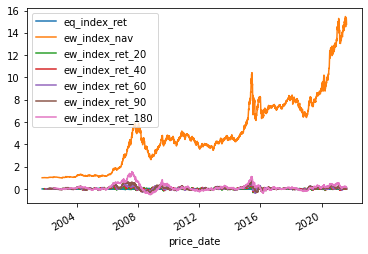

In [4]:
merged_fund_index.plot()

In [5]:
# save
DataLoader.save_2_excel(merged_fund_index,name='ew_selected_fund_index',path='merged_fund_index.xlsx')

In [6]:
# update
# from conn.conn import GeneralConn
# import cx_Oracle
# cx_Oracle.init_oracle_client(lib_dir='F:\\Data\\selected_fund_index\\instantclient_21_3')
# from gjdata import OracleDB
# Config = Configs()
# conn = GeneralConn(Config['DB_CONFIG'],OracleDB)
# df = conn.query("select F_INFO_WINDCODE,PRICE_DATE,F_NAV_ADJUSTED from app_winddb.ChinaMutualFundNAV where price_date > 20210801  and SUBSTR(F_INFO_WINDCODE,7,3) ='.OF' ")